# L5, L6 - Michał Kowalik

In [6]:
# importy, przydatne funkcje

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# np.vander(x, degree + 1)
# przyjmuje listę liczb x
# zwraca tabelę po zmianie zmiennych na wielomian stopnia x
# można sobie przetestować dla lepszego zrozumienia

def f(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    w tym wypadku przykładowa prawdziwa funkcja to y(x) = 2 * sin(1.5 * x)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    podobnie jak f, ale z dodanym szumem
    uwaga - współrzędna x jest "losowana" z rozkładu jednostajnego
    (dla naszych zastosowań nie robi to większej różnicy, ale porządni informatycy
    mogą chcieć zastąpić linspace przez prawdziwe losowanie)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    zwraca nauczony model regresji z wielomianową zmianą zmiennych
    (x,y): dane treningowe
    degree: stopień wielomianu
    '''
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    zwraca predykcję nauczonego modelu regresji z wielomianową zmianą zmiennych
    x: dane do predykcji
    '''
    degree = model.coef_.size - 1 # wyciągamy stopień wielomianu z modelu
    y = model.predict(np.vander(x, degree + 1))
    return y

f_x, f_y = f(50) # tym narysujemy sinusa

## Cwiczenie 0 [0 pkt] 

(Do zrobienia przed przejściem dalej)

Jaki ``Expected loss`` będzie miał model "overfitted_model"?

Hint: mamy możliwość samplowania punktów z rozkładu $p(\mathbf{x},  y)$

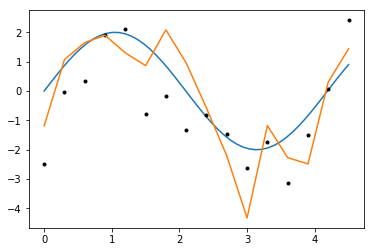

In [11]:
# Tu sie dopasowalismy
X_train, y_train = sample(16)
x, y = sample(16)
overfitted_model = fit_polynomial(X_train, y_train, 15)
p_y = apply_polynomial(overfitted_model, X_train)
plt.plot(f_x, f_y)
plt.plot(X_train, y, 'k.')
plt.plot(X_train, p_y)

In [12]:
x, y = sample(200)
y_pred = apply_polynomial(overfitted_model, x)

def MSE(y, y_hat):
    return (y - y_hat)**2.0

expected_loss_overfitted = (MSE(y, y_pred).sum())/len(x)
print expected_loss_overfitted

268.917828356


## Ćwiczenie 1 [2 pkt]

W idealnym świecie mielibyśmy dostęp do procesu generowania danych i moglibyśmy znaleźć optymalny model (a przynajmniej wybrać stopień wielomianu w regresji liniowej) oraz oszacować jego bias i variance.

1. Napisz kod, który dla ustalonego stopnia wielomianu ($K$) liczy bias, variance oraz MSE tego modelu (wielkości te estymujemy podobnie jak w ćwiczeniu 0.).

2. Dla jakich wartości $K$ można powiedzieć że mamy model "High variance/low bias"?

3. Jaka wartość $K$ daje minimum błędu MSE?

Jeśli macie Państwo problem z wymyśleniem wzoru na powyższe wielkości, proszę jeszcze raz przeczytać ze zrozumieniem sekcję o rozkładzie błędu. Kluczowe jest to, że bias liczymy średnio po różnych zestawach danych $D$ - czym są w tym wypadku dane $D$? Jak zrobić kilkadziesiąt/set różnych takich zestawów? Czy rozmiar danych $D$ może ulegać zmianie? (jeśli nie, to proszę ustawić go np. na 43 lub inną liczbę tego rzędu).

Oczekiwany wynik (z dokładnością do wartości) - poziomo $K$, pionowo bias/variance/MSE: 

<img src="figures/L5/L5_1_wynik.png">

Uwagi/wskazówki:

* Proszę użyć zakresu K od 0 do 10 (nie od 0 do 15 jak na obrazku)
* Proszę użyć zbioru testowego o rozmiarze 100. Zbiór testowy powinien być pobrany bez szumu (z użyciem funkcji "f")
* Potrzebne wzory można znaleźć też w Bishop - Pattern recognition and Machine Learning, str. 151, 3.45, 3.46, 3.47. Tutaj dla wygody je kopiujemy:

$L$ - liczba różnych zbiorów trenujących <br>
$N$ - liczba przykładów w zbiorze testującym <br>
$h(x_{n})$ - wartość prawdziwa <br>
$$ \overline{y}(x) = \frac{1}{N} \sum_{l=1}^{L} y^{(l)}(x) $$
$$ bias^2 = \frac{1}{N} \sum_{n=1}^{N} \{ \overline{y}(x_{n}) - h(x_{n})   \}^{2}  $$
$$ variance = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{L} \sum_{l=1}^{L} \{ y^{(l)}(x_n) - \overline{y}(x_{n}) \}^{2} $$

* Proszę użyc zbiorów trenujących (do uczenia $y^{(l)}$) o rozmiarze 20. Proszę wytrenować $N=200$ takich funkcji.
* MSE proszę policzyć "empirycznie", czyli dla każdego K wykonując:

```
model = fit_polynomial(X_train, y_train, k)
y_pred = apply_polynomial(model, X_test)
mse = ...
```

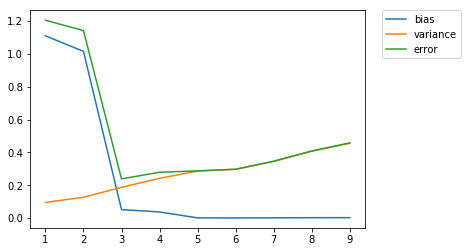

In [13]:
L = 200
N = 100
N_train = 20

degrees=range(1, 10)
biases = []
variances = []
errors = []

for k in degrees:
    
    models = []
    
    for _ in range(L):
        
        X_train, y_train = sample(N_train)
        models.append(fit_polynomial(X_train, y_train, k))
        
    X_test, y_test = f(N)
    y_pred_tab = []
    mses = []
    
    for model in models:
        
        y_pred_tab.append(apply_polynomial(model, X_test))
        mses.append(MSE(y_pred_tab[-1], y_test))
    
        
    y_pred_tab = np.array(y_pred_tab)
    mses = np.array(mses)
    
    y_pred_means = y_pred_tab.mean(axis=0)
    biases.append((MSE(y_pred_means, y_test)).mean())
    variances_inner = []
    
    i=0
    
    for column in y_pred_tab.transpose():
        variances_inner.append(MSE(column, column.mean()).mean())
        
    variances.append(np.mean(variances_inner))
        
    
    y_pred = apply_polynomial(model, X_train)
    
    
_ = plt.plot(degrees, biases, label="bias")
_ = plt.plot(degrees, variances, label='variance')
_ = plt.plot(degrees, np.add(biases, variances), label='error')
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

_ = plt.show()

## Cwiczenie 2 [1 pkt]

Im więcej podziałów w Cross Validation tym mniejczy czy większy variance **estymatora**? A jak zmienia się jego bias? Odpowiedź uzasadnij.

Im więcej podziałów, tym mniej elementów w zbiorze testującym, a więcej w zbiorze treniującym. Więcej elementów jest wspólnych pomiędzy kolejnymi zbiorami trenującymi. Zatem wariancja jest bardziej czuła na elementy, które bardziej odbiegają od modelu nauczonego na danych trenujących. Bias natomiast jest mniejszy, bo modele wytrenowane są bardzo podobne do siebie, bo dostają bardzo podobne zbiory trenującr. To powoduje, że wariancja estymatora się zwiększa, a bias się zmniesza.



## Cwiczenie 3 [1 pkt]

Pokaż, że logposterior ($log p(\theta | X, y)$) dla regresji liniowej ma taką postać jak $C(M)$.

brak :-(

# L6

## Ćwiczenie 1 [2 pkt]

Napisać trzy generatory zestawów hiperparametrów:
* generator grid search [robimy wspólnie za 0 pkt],
* generator k elementów random grid search,
* generator k elementów random search.

Hiperparametry podajemy jako słownik {nazwa_hiperparametru: lista_wartości/rozkład}.

Generator ma yieldować słowniki {nazwa_hiperparametru: wartość_hiperparametru}

Rozkłady prawdopodobieństwa możecie Państwo podawać w dowolny sposób - np. jako pythonową funkcję, jako string z nazwą (a możliwe rozkłady zakodować na sztywno w funkcji zwracającej generatory) itp. Proponuję zastosować konwencję opisaną w następnej komórce [czy ktoś z Państwa ma inny pomysł, jak podawać rozkłady?].

Losowe generatory mają przyjmować random_state i działać deterministycznie przy ustalonym random_state (należy ustawić w środku seed generatora liczb losowych na random_state).


In [18]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from numpy.random import RandomState
from itertools import product

In [19]:
# Tworzymy fabryki samplerów, każda fabryka parametryzuje pewną rodzinę rozkładów prawdopodobieństwa
# sampler pamięta jeden konkretny rozkład prawdopodobieństwa
# jedynym argumentem samplera jest obiekt numpy.random.RandomState, który oznaczamy rng
# sampler zwraca jedną wartość ze swojego rozkładu
# ponieważ rng pamięta swój stan, to możemy np. raz stworzyć go na początku i podawać w pętli

# rodzina rozkładów jednostajnych na podanych listach elementów
# sampler losuje z rozkładu jednostajnego na liście l
def uniform_from_list(l):
    def sampler(rng):
        return l[rng.randint(0,len(l))]
    return sampler

# rodzina rozkładów jednostajnych na przedziałach liczb całkowitych
# sampler losuje z rozkładu jednostajnego na podzbiorze liczb całkowitych od low (włącznie) do high (wyłącznie)
def uniform_int_on_interval(low, high):
    def sampler(rng):
        return rng.randint(low,high)
    return sampler

# rodzina rozkładów jednostajnych na przedziałach
# sampler losuje z rozkładu jednostajnego na przedziale [low, high]
def uniform_on_interval(low, high):
    def sampler(rng):
        return rng.uniform(low, high)
    return sampler

# rodzina rozkładów jednostajnych na przedziałach w wykładniku potęgi liczby 10
# sampler losuje liczbę alpha z rozkładu jednostajnego na przedziale [low, high], a następnie zwraca 10^alpha
def log_uniform_on_interval(low, high):
    def sampler(rng):
        return 10.**rng.uniform(low, high)
    return sampler

# rodzina rozkładów gaussa
# sampler losuje liczbę z rozkładu N(mean, std^2)
def normal(mean, std):
    def sampler(rng):
        return rng.normal(loc=mean, scale=std)
    return sampler

# rodzina rozkładów gaussa w wykładniku potęgi liczby 10
# sampler losuje liczbę alpha z rozkładu N(mean, std^2), a następnie zwraca 10^alpha
def log_normal(mean, std):
    def sampler(rng):
        return 10**rng.normal(loc=mean, scale=std)
    return sampler

In [20]:
print "Tworzymy obiekt klasy RandomState"
rng = RandomState(743)
s1 = normal(0.,1.)
s2 = log_uniform_on_interval(-4.,4.)
s3 = uniform_int_on_interval(-2,5)
print "Losujemy..."
for _ in xrange(4):
    print s1(rng), s2(rng), s3(rng)

print ""
print "Resetujemy RandomState"
rng = RandomState(743)
s1 = normal(0.,1.)
s2 = log_uniform_on_interval(-4.,4.)
s3 = uniform_int_on_interval(-2,5)
print "Losujemy..."
for _ in xrange(4):
    print s1(rng), s2(rng), s3(rng)

print ""
print "Resetujemy RandomState"
rng = RandomState(743)
s1 = normal(0.,1.)
s2 = log_uniform_on_interval(-4.,4.)
s3 = uniform_int_on_interval(-2,5)
print "Losujemy w innej kolejności, wypisujemy w starej..."
for _ in xrange(4):
    _s3 = s3(rng)
    _s2 = s2(rng)
    _s1 = s1(rng)
    print _s1, _s2, _s3

print ""
print "samplery współdzielą rng, kolejność losowania ma znaczenie!"

Tworzymy obiekt klasy RandomState
Losujemy...
-0.842587612353 0.000472401243122 0
0.153322909413 543.807159801 -2
-0.341758747593 1765.13251908 3
-0.593715774857 8.32922889041 -1

Resetujemy RandomState
Losujemy...
-0.842587612353 0.000472401243122 0
0.153322909413 543.807159801 -2
-0.341758747593 1765.13251908 3
-0.593715774857 8.32922889041 -1

Resetujemy RandomState
Losujemy w innej kolejności, wypisujemy w starej...
-1.50310753692 5.57429041087 4
0.394467225601 0.000472401243122 0
0.343807964283 543.807159801 0
-0.775106170237 1765.13251908 4

samplery współdzielą rng, kolejność losowania ma znaczenie!


In [22]:
def grid_search(grid):
    (keys, values_grid) = zip(*grid.iteritems())
    for values in product(*values_grid):
        yield dict(zip(keys, values))

def random_grid_search(grid, k=20, random_state=43):
    rng = RandomState(random_state) # ustalamy jeden wspólny rng
    (keys, values_grid) = zip(*grid.iteritems())
    parameters_product = np.array(list(product(*values_grid)))
    chosen = set()
    while len(chosen)<k:
        chosen.add(rng.randint(0, parameters_product.shape[0]))
                   
    for p in parameters_product[np.sort(np.array(list(chosen)))]:
        yield dict(zip(keys, p))

def random_search(grid, k=20, random_state=43):
    rng = RandomState(random_state) # ustalamy jeden wspólny rng
    (keys, samplers) = zip(*sorted(grid.iteritems())) # sortujemy klucze, kolejność samplowania jest ważna!
    # wysamplować k zestawów hiperparametrów
    # ...
    for _ in xrange(k):
        values = []
        for s in samplers:
            values.append(s(rng))
        yield dict(zip(keys, values))


In [23]:
# assert dla grid_search
for d in grid_search({'C': [0.1, 1., 10., 100.], 'gamma': [0.0001, 0.0003, 0.001]}):
    print d
    
print ""

for d in random_grid_search({'C': [0.1, 1., 10., 100.], 'gamma': [0.0001, 0.0003, 0.001]}, k=8):
    print d

{'C': 0.1, 'gamma': 0.0001}
{'C': 0.1, 'gamma': 0.0003}
{'C': 0.1, 'gamma': 0.001}
{'C': 1.0, 'gamma': 0.0001}
{'C': 1.0, 'gamma': 0.0003}
{'C': 1.0, 'gamma': 0.001}
{'C': 10.0, 'gamma': 0.0001}
{'C': 10.0, 'gamma': 0.0003}
{'C': 10.0, 'gamma': 0.001}
{'C': 100.0, 'gamma': 0.0001}
{'C': 100.0, 'gamma': 0.0003}
{'C': 100.0, 'gamma': 0.001}

{'C': 0.10000000000000001, 'gamma': 0.0001}
{'C': 0.10000000000000001, 'gamma': 0.00029999999999999997}
{'C': 0.10000000000000001, 'gamma': 0.001}
{'C': 1.0, 'gamma': 0.0001}
{'C': 1.0, 'gamma': 0.00029999999999999997}
{'C': 1.0, 'gamma': 0.001}
{'C': 100.0, 'gamma': 0.00029999999999999997}
{'C': 100.0, 'gamma': 0.001}


In [24]:
for d in random_search(
        {'C': log_uniform_on_interval(-5., 5.),
         'gamma': uniform_on_interval(0.,0.1),
         'nb_sth': uniform_from_list([1,4,9,13,22])},
        k=15,
        random_state=43):
    print d

{'C': 0.00014143134252521947, 'nb_sth': 9, 'gamma': 0.06090665392794814}
{'C': 0.0025462216096392796, 'nb_sth': 13, 'gamma': 0.03271390558111398}
{'C': 5.590022241698091e-05, 'nb_sth': 1, 'gamma': 0.004505286023886656}
{'C': 1.950465371399982e-05, 'nb_sth': 13, 'gamma': 0.0733748296280283}
{'C': 0.0002976304542098269, 'nb_sth': 13, 'gamma': 0.0011286104130902254}
{'C': 3.705521747936987e-05, 'nb_sth': 22, 'gamma': 0.08666486408992002}
{'C': 31.420766577465653, 'nb_sth': 22, 'gamma': 0.05808772319264447}
{'C': 5.842880444285076e-05, 'nb_sth': 1, 'gamma': 0.08432246942297046}
{'C': 16.058920736060898, 'nb_sth': 22, 'gamma': 0.04037700398666926}
{'C': 35065.59811614318, 'nb_sth': 22, 'gamma': 0.04457583608397189}
{'C': 6.683446823678905e-05, 'nb_sth': 13, 'gamma': 0.08970985799815344}
{'C': 965.8767858660282, 'nb_sth': 1, 'gamma': 0.0332329385020804}
{'C': 0.28068153065434537, 'nb_sth': 1, 'gamma': 0.08247676837174123}
{'C': 12207.52376193616, 'nb_sth': 13, 'gamma': 0.09101530757801567}
{